In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20,10)

In [151]:
df1 = pd.read_csv('file_latestCopy.csv')
print(df1.shape)
print(df1.info())
print(df1.head())

(150644, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150644 entries, 0 to 150643
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   location    150644 non-null  object 
 1   total_sqft  150644 non-null  int64  
 2   bath        150644 non-null  int64  
 3   price       150644 non-null  float64
 4   bhk         150644 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 5.7+ MB
None
      location  total_sqft  bath   price  bhk
0    Vastrapur        1615     2  120.00    3
1  Nava Naroda        2493     2   83.10    3
2         Gota         657     2   59.68    3
3        Vasna         770     1   52.36    2
4       Lambha        1863     2   75.00    4


In [152]:
# df1.groupby('area_type')['area_type'].agg('count')

In [153]:
# df2 = df1.drop(['area_type','society','balcony','availability'], axis="columns")
df1.head()
df2=df1

In [154]:
df2.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [155]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [156]:
# df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
# df3.head()

In [157]:
df3.bhk.unique()

array([ 3,  2,  4,  1,  5,  6,  7,  8, 10, 12,  9, 11, 15, 13],
      dtype=int64)

In [158]:
df3[df3.bhk > 13]

,location,total_sqft,bath,price,bhk
10838,Turner Road,6500,8,225.0,15
11021,I S B T Turner Road,6500,8,225.0,15
18402,New Friends Colony,9541,8,2764.0,15
21404,Prakash Mohalla,10500,8,600.0,15
22392,New Friends Colony,10202,8,4655.0,15
22745,Shanti Niketan,12611,8,6546.0,15
86982,Alipore Park Place,10000,8,1500.0,15
89652,Virudhunagar,11000,8,297.0,15
124161,Changurabhata,16000,8,285.0,15
150633,Krishnarajapura,9800,8,550.0,15


In [159]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [160]:
df3[~df3['total_sqft'].apply(is_float)]
# df3[Sdf3['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk


In [161]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [162]:
convert_sqft_to_num('2133')

2133.0

In [163]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [164]:
convert_sqft_to_num('34.46Sq. Meter')

In [165]:
df4 = df3.copy()
# df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
# df4.total_sqft.unique()


In [166]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Vastrapur,1615,2,120.00,3,7430.340557
1,Nava Naroda,2493,2,83.10,3,3333.333333
2,Gota,657,2,59.68,3,9083.713851
3,Vasna,770,1,52.36,2,6800.000000
4,Lambha,1863,2,75.00,4,4025.764895


In [167]:
len(df5.location.unique())

3561

In [168]:
location_stats = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Mira Road East             3584
New Town                   3014
Rajarhat                   2065
Bhatagaon                  1833
Kharadi                    1520
                           ... 
Sanjeeva Reddy Nagar          1
Sankari 3                     1
Kapparada Road                1
Santa Cruz                    1
168 Sector 13 Main Road       1
Name: location, Length: 3561, dtype: int64

In [169]:
len(location_stats[location_stats<=10])

2291

In [170]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Ponneri                    10
Narayan Vihar              10
Safilguda                  10
Babar Road                 10
Sikkandar Chavadi          10
                           ..
Sanjeeva Reddy Nagar        1
Sankari 3                   1
Kapparada Road              1
Santa Cruz                  1
168 Sector 13 Main Road     1
Name: location, Length: 2291, dtype: int64

In [171]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

1271

In [172]:
df5.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Vastrapur,1615,2,120.00,3,7430.340557
1,Nava Naroda,2493,2,83.10,3,3333.333333
2,Gota,657,2,59.68,3,9083.713851
3,Vasna,770,1,52.36,2,6800.000000
4,Lambha,1863,2,75.00,4,4025.764895
5,Nava Naroda,1800,2,53.01,3,2945.000000
6,Vatva,1179,1,31.00,2,2629.346904
7,Vastral,1377,1,45.45,2,3300.653595
8,Shilaj,1750,2,81.00,3,4628.571429
9,Isanpur,1359,2,40.56,3,2984.547461


In [173]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
2,Gota,657,2,59.68,3,9083.713851
24,Bhadaj,546,1,36.99,2,6774.725275
29,Gota,660,2,59.95,3,9083.333333
76,Gota,662,2,60.13,3,9083.081571
77,Gota,546,1,50.51,2,9250.915751


In [174]:
print(df5.shape)
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
print(df6.shape)

(150644, 6)
(146716, 6)


In [175]:
df6.price_per_sqft.describe()

count    146716.000000
mean       8553.132175
std       10678.291367
min         424.521616
25%        4289.846266
50%        5897.435897
75%        8557.213930
max      198055.347794
Name: price_per_sqft, dtype: float64

In [176]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft < (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(114440, 6)

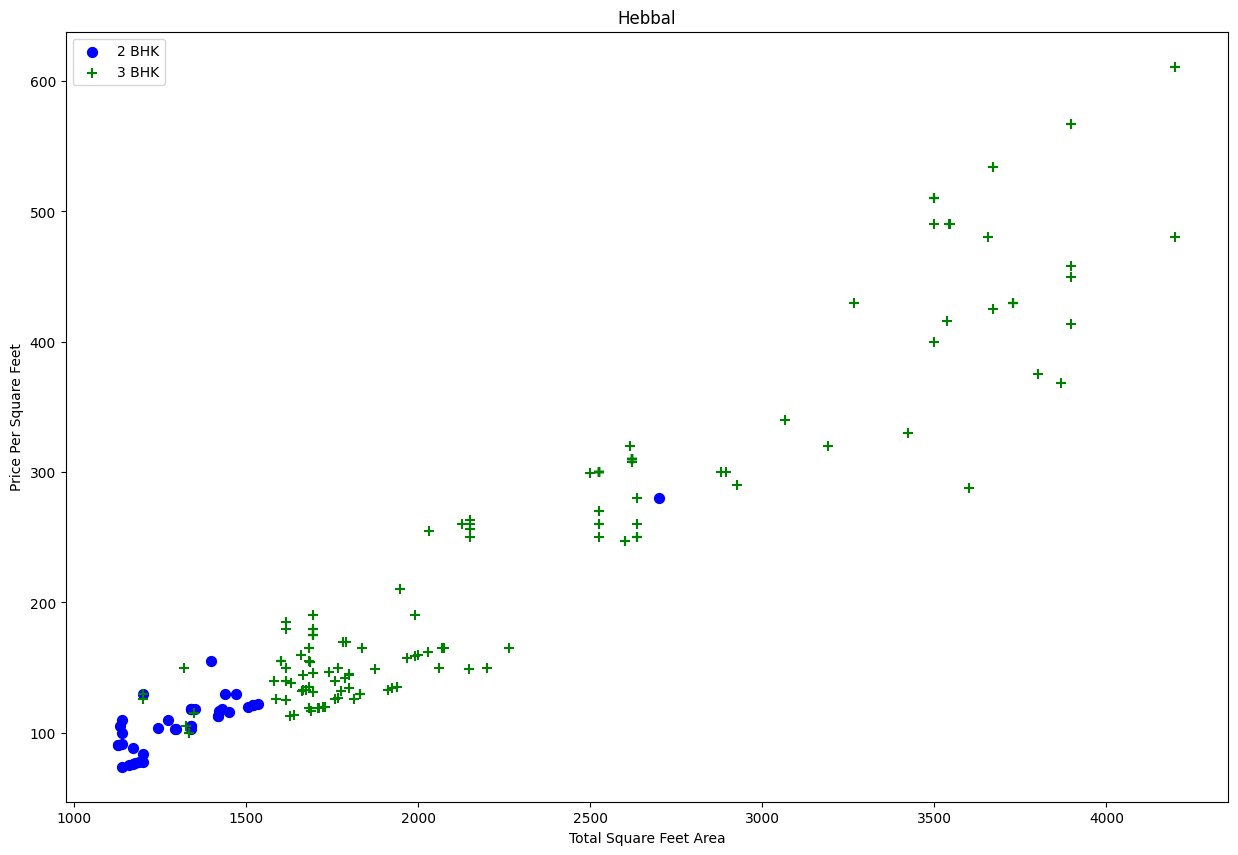

In [177]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color="blue", label="2 BHK", s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker="+",color="green", label="3 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Hebbal")

In [178]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft <(stats['mean'])].index.values )
    return df.drop(exclude_indices, axis="index")

df8 = remove_bhk_outliers(df7)
df8.shape

(79054, 6)

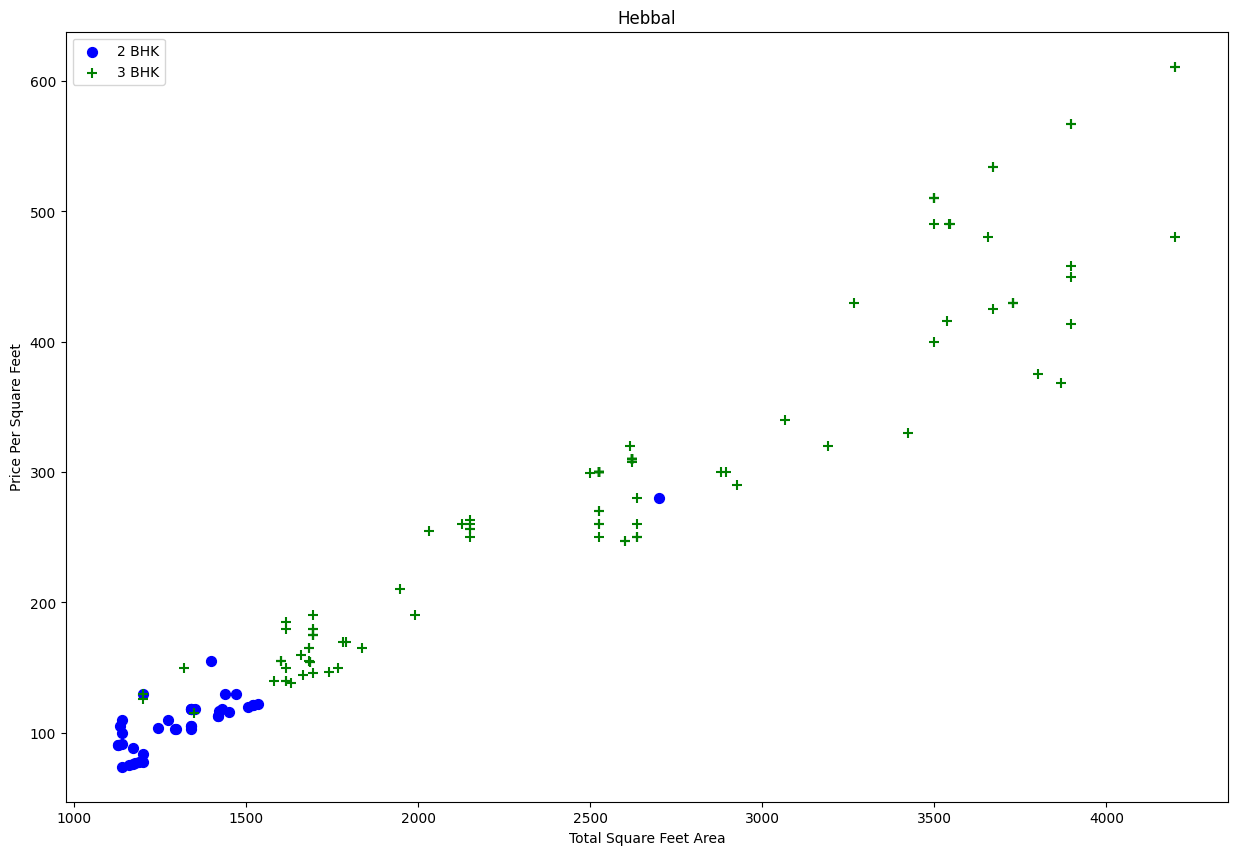

In [179]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

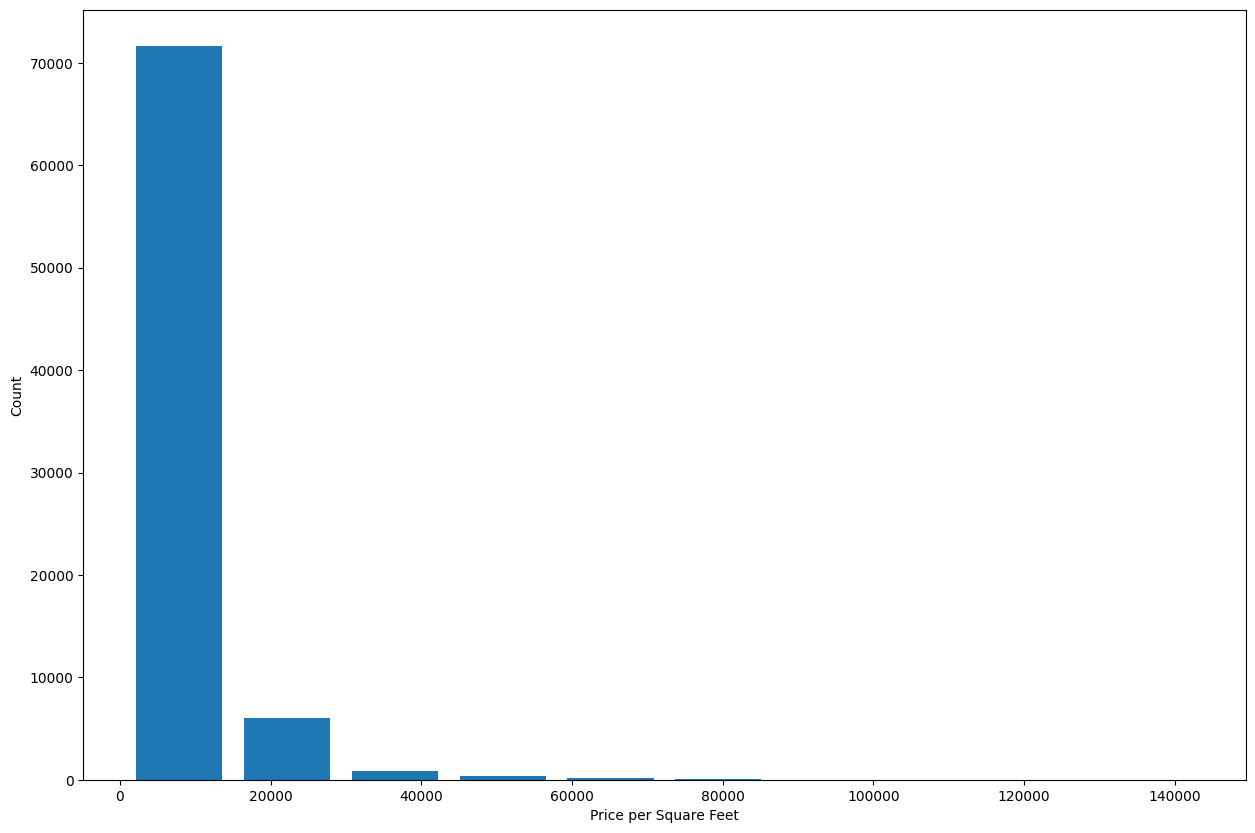

In [180]:
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

In [181]:
df8[df8.bath > df8.bhk + 2]

,location,total_sqft,bath,price,bhk,price_per_sqft


In [182]:
df9 = df8[df8.bath < df8.bhk + 2]
df9.shape

(79054, 6)

In [183]:
df10 = df9.drop(['price_per_sqft'], axis="columns")
df10.head()

,location,total_sqft,bath,price,bhk
0,Ab Bypass Road,1851,2,70.0,3
1,Ab Bypass Road,1441,1,55.0,2
3,Ab Bypass Road,1087,1,41.0,2
5,Ab Bypass Road,829,1,28.5,2
7,Ab Bypass Road,1100,1,23.0,2


In [184]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,Ab Bypass Road,Abhva,Abiramapuram,Achutapuram,Adajan,Adajan Gam,Adambakam,Adarsh Nagar,Adhanur,Adibatla,...,Whitefield Hope Farm Junction,Wilson Garden,Worli,Yapral,Yelahanka,Yelahanka New Town,Yendada,Yerawada,Yeshwantpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
df11 = pd.concat([df10, dummies.drop(['other'], axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,Ab Bypass Road,Abhva,Abiramapuram,Achutapuram,Adajan,...,Whitefield,Whitefield Hope Farm Junction,Wilson Garden,Worli,Yapral,Yelahanka,Yelahanka New Town,Yendada,Yerawada,Yeshwantpur
0,Ab Bypass Road,1851,2,70.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ab Bypass Road,1441,1,55.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ab Bypass Road,1087,1,41.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Ab Bypass Road,829,1,28.5,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Ab Bypass Road,1100,1,23.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
df12 = df11.drop(['location'], axis="columns")
df12.head()

,total_sqft,bath,price,bhk,Ab Bypass Road,Abhva,Abiramapuram,Achutapuram,Adajan,Adajan Gam,...,Whitefield,Whitefield Hope Farm Junction,Wilson Garden,Worli,Yapral,Yelahanka,Yelahanka New Town,Yendada,Yerawada,Yeshwantpur
0,1851,2,70.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1441,1,55.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1087,1,41.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,829,1,28.5,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1100,1,23.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
df13 = df12.drop(['bath'], axis="columns")
df13.head()

,total_sqft,price,bhk,Ab Bypass Road,Abhva,Abiramapuram,Achutapuram,Adajan,Adajan Gam,Adambakam,...,Whitefield,Whitefield Hope Farm Junction,Wilson Garden,Worli,Yapral,Yelahanka,Yelahanka New Town,Yendada,Yerawada,Yeshwantpur
0,1851,70.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1441,55.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1087,41.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,829,28.5,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1100,23.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
df14 = df13.drop(['bhk'], axis="columns")
df14.head()

,total_sqft,price,Ab Bypass Road,Abhva,Abiramapuram,Achutapuram,Adajan,Adajan Gam,Adambakam,Adarsh Nagar,...,Whitefield,Whitefield Hope Farm Junction,Wilson Garden,Worli,Yapral,Yelahanka,Yelahanka New Town,Yendada,Yerawada,Yeshwantpur
0,1851,70.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1441,55.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1087,41.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,829,28.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1100,23.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
X = df13.drop(['price'], axis="columns")
y = df13.price

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [191]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train.values,y_train.values)
lr_clf.score(X_test.values,y_test.values)

0.822875052646185

In [43]:
# from sklearn.ensemble import RandomForestRegressor
# model=RandomForestRegressor()
# model.fit(X_train,y_train)
# model.score(X_test,y_test)

In [41]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82203741, 0.84559061, 0.83695901, 0.84773977, 0.82909904])

In [52]:
# from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor
# def find_best_model_using_gridsearchcv(X,y):
#     algos = {
#         'linear_regression' : {
#             'model': LinearRegression(),
#             'params': {
#                 'normalize': [True, False]
#             }
#         },
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1,2],
#                 'selection': ['random', 'cyclic']
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeRegressor(),
#             'params': {
#                 'criterion' : ['mse','friedman_mse'],
#                 'splitter': ['best','random']
#             }
#         }
#     }

#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X,y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })
    
#     return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# find_best_model_using_gridsearchcv(X,y)

In [143]:
def predict_price(location,sqft):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    # x[1] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [202]:
n=predict_price('Vile Parle West',2400)
b=predict_price('Mundhwa',1077)
g=predict_price('Tiruvottiyur',1592)
k=predict_price('Ab Bypass Road',3000)
print(n)
print(b)
print(g)
print(k)


1052.6670162538624
222.13814376990493
287.97988711563846
457.4145018196924


In [46]:
predict_price('sola',4032,4)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [47]:
predict_price('Indira Nagar',1000)

TypeError: predict_price() missing 1 required positional argument: 'bhk'

In [48]:
predict_price('Vatva',1179,2)

64.93909255466163

In [201]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [200]:
import json
columns = {
    'data_columns' : [col for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))